# StackOverFlow Survey Exloration

## Connect to data source

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
data_folder = '/content/drive/MyDrive/StackOverFlow/'

## Import

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

---

## Collecting data

We use the data from a survey of StackOverflow on their developer's community.  We could download the dataset from  this [link](https://drive.google.com/file/d/1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB/view).

According to the description flie "README_2020.txt":
>The enclosed data set is the full, cleaned results of the 2020 Stack Overflow Developer Survey. Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents. There are three files besides this README:
>
>1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
>2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
>3. so_survey_2020.pdf - PDF file of survey instrument
>
>The survey was fielded from February 5 to February 28, 2020. The median time spent on the survey for qualified responses was 16.6 minutes.
>
>Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

We eliminate some columns for easy analysis on file "survey_results_public-short.csv" (from 61 to 29 columns) and the description file "survey_results_schema-short.csv" to understand what the columns mean. 

Moreover: 
- This dataset only represents their community on StackOverFlow, not for global developers, thus the insights from this dataset are limited inside this community.

LICENSE
>This database - The Public 2020 Stack Overflow Developer Survey Results - is made available under the Open Database License (ODbL): http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/
>
>TLDR: You are free to share, adapt, and create derivative works from The Public 2020 Stack Overflow Developer Survey Results as long as you attribute Stack Overflow, keep the database open (if you redistribute it), and continue to share-alike any adapted database under the ODbl.


---

## Explore data I

### Read data

Firstly, read data from "survey_results_public-short.csv" and save the result into DataFrame `survey_df`. Moreover, the index column is the `Respondent`.

In [4]:
survey_df = pd.read_csv(data_folder+"survey_results_public-short.csv", index_col='Respondent')

In [5]:
# TEST
survey_df.head()

,MainBranch,Hobbyist,Age,ConvertedComp,Country,DevType,EdLevel,Employment,Ethnicity,Gender,...,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,OpSys,PlatformDesireNextYear,PlatformWorkedWith,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,NaN,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,...,Fairly important,Once a year,Often: 1-2 days per week or more,Visit Stack Overflow;Go for a walk or other ph...,Windows,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,50.0,36,27
2,I am a developer by profession,No,NaN,NaN,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,...,Fairly important,Once a year,NaN,Visit Stack Overflow;Go for a walk or other ph...,MacOS,iOS;Kubernetes;Linux;MacOS,iOS,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,...,NaN,Once a decade,NaN,NaN,Linux-based,NaN,NaN,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,NaN,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,...,Not at all important/not necessary,Once a year,Occasionally: 1-2 days per quarter but less th...,NaN,Linux-based,NaN,NaN,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,NaN,United States,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,...,Very important,Once a year,NaN,Call a coworker or friend;Visit Stack Overflow...,Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,NaN,15,8


### How many rows and columns?

Next, we save the number of columns and rows into `num_rows` and `num_cols`.

In [6]:
num_rows, num_cols = survey_df.shape
num_rows, num_cols

(64461, 28)

### What is each row meaning? Are there any diffenrence?

According to "README_2020.txt", each row in `survey_df` represents for the survey's result of one people.

### Is there any duplicated row?

In [7]:
num_duplicated_rows = survey_df.index.duplicated().sum()
num_duplicated_rows

0

### How are the columns meaning?

In [8]:
col_meaning_df = pd.read_csv(data_folder+"survey_results_schema-short.csv", index_col='Column')
pd.set_option('max_colwidth', None)

In [9]:
col_meaning_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order of survey response time)
MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
Hobbyist,Do you code as a hobby?
Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
Country,Where do you live?
DevType,Which of the following describe you? Please select all that apply.
EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
Employment,Which of the following best describes your current employment status?


### What is the datatype of columns?

In [10]:
dtypes= survey_df.dtypes
dtypes

MainBranch                       object
Hobbyist                         object
Age                             float64
ConvertedComp                   float64
Country                          object
DevType                          object
EdLevel                          object
Employment                       object
Ethnicity                        object
Gender                           object
JobFactors                       object
JobSat                           object
LanguageDesireNextYear           object
LanguageWorkedWith               object
MiscTechDesireNextYear           object
MiscTechWorkedWith               object
NEWCollabToolsDesireNextYear     object
NEWCollabToolsWorkedWith         object
NEWEdImpt                        object
NEWLearn                         object
NEWOvertime                      object
NEWStuck                         object
OpSys                            object
PlatformDesireNextYear           object
PlatformWorkedWith               object


As we can see, the column `YearsCode` và `YearsCodePro` should  be `int64` datatype. Let's explore what values it has

In [11]:
survey_df['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [12]:
survey_df['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

Let's mapping the data values into integer for easy compute some stats like min, max, median, and so on.

---

## Preprocess data I

We will map the column "YearsCode" and "YearsCodePro" into `float64`, with 2 values: "Less than 1 year" $\to$ 0, "More than 50 years" $\to$ 51.

In [13]:
survey_df.replace({"YearsCode": {"Less than 1 year": 0, "More than 50 years": 51},"YearsCodePro": {"Less than 1 year": 0, "More than 50 years": 51}}, inplace=True)
survey_df = survey_df.astype({'YearsCode':'float', 'YearsCodePro':'float'})
survey_df.dtypes

MainBranch                       object
Hobbyist                         object
Age                             float64
ConvertedComp                   float64
Country                          object
DevType                          object
EdLevel                          object
Employment                       object
Ethnicity                        object
Gender                           object
JobFactors                       object
JobSat                           object
LanguageDesireNextYear           object
LanguageWorkedWith               object
MiscTechDesireNextYear           object
MiscTechWorkedWith               object
NEWCollabToolsDesireNextYear     object
NEWCollabToolsWorkedWith         object
NEWEdImpt                        object
NEWLearn                         object
NEWOvertime                      object
NEWStuck                         object
OpSys                            object
PlatformDesireNextYear           object
PlatformWorkedWith               object


---

## Explore data II

### Data distribution of numerical column

For each numerical column, we compute some statistics below:
- % missing data.
- The minimum value
- The lower quartile
- The median
- The upper quartile
- The maximum value

We save the results into DataFrame `nume_col_info_df` including: 
- Name of column.
- Values of rows: "missing_percentage", "min", "lower_quartile", "median", "upper_quartile", "max".

In [14]:
def agg_1(col):
    result = []
    result.append(col.isna().mean() * 100) # missing percpercentage
    result.append(col.min()) # min
    result.append(col.quantile(0.25)) # lower quartile
    result.append(col.median()) # median
    result.append(col.quantile(0.75)) # upper qquartile
    result.append(col.max()) # max
    return pd.Series(result, index=['missing_percentage', 'min','lower_quartile', 'median', 'upper_quartile', 'max'])
    
numerical_df = survey_df.select_dtypes(exclude='object')
nume_col_info_df = numerical_df.agg(agg_1).round(1)
nume_col_info_df

,Age,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
missing_percentage,29.5,46.1,36.2,10.5,28.1
min,1.0,0.0,1.0,0.0,0.0
lower_quartile,24.0,24648.0,40.0,6.0,3.0
median,29.0,54049.0,40.0,10.0,6.0
upper_quartile,35.0,95000.0,44.0,17.0,12.0
max,279.0,2000000.0,475.0,51.0,51.0


**Are there any invalid values in a column?**
- "Age" column:  "Age" < "YearCode" or "Age" < "YearCodePro" then save results into `num_invalid_Age_vals`.
- "WorkWeekHrs" column: "WorkWeekHrs" <= 168 (hours), any values are higher than 168 is an invalid value and we save result into `num_invalid_WorkWeekHrs`.
- "YearsCode" column: "YearsCode" <  "YearsCodePro"  or  "YearCode" > "Age". Then save result into `num_invalid_YearsCode`.
- "YearsCodePro" column: "YearsCodePro" >  "YearsCode" or "YearCode" >"Age". Then save result into `num_invalid_YearsCodePro`.

In [15]:
num_invalid_Age_vals = ((numerical_df['Age'] < numerical_df["YearsCode"]) | (numerical_df['Age'] < numerical_df["YearsCodePro"])).sum()
num_invalid_WorkWeekHrs_vals = (numerical_df['WorkWeekHrs'] > 24*7).sum()
num_invalid_YearsCode_vals = ((numerical_df['YearsCode'] < numerical_df["YearsCodePro"]) | (numerical_df['YearsCode'] > numerical_df["Age"])).sum()
num_invalid_YearsCodePro_vals = ((numerical_df['YearsCodePro'] > numerical_df["YearsCode"]) | (numerical_df['YearsCodePro'] > numerical_df["Age"])).sum()

In [17]:
print(num_invalid_Age_vals)
print(num_invalid_WorkWeekHrs_vals)
print(num_invalid_YearsCode_vals)
print(num_invalid_YearsCodePro_vals)

16
62
499
486


---

## Preprocess data II

We would like to delete all invalid values as mentioned.

In [18]:
survey_df.drop(survey_df[(survey_df.Age < survey_df.YearsCode) | ( survey_df.YearsCode< survey_df.YearsCodePro)| (survey_df.WorkWeekHrs > 24*7)].index,inplace=True)

---

## Explore data III

### Data distribution of categorical columns?

With the categorical column, we would like to compute:
- Missing percentage. 
- Number of unique values.
- Percent of each unique values.

We save the result into DataFrame `cate_col_info_df: 
- Name of column.
- Name of each row: "missing_percentage", "num_values", "value_percentages"  


In [19]:
multichoice_cols = ['DevType', 'Gender', 'JobFactors', 
                    'LanguageWorkedWith', 'LanguageDesireNextYear', 
                    'MiscTechWorkedWith', 'MiscTechDesireNextYear', 
                    'NEWCollabToolsWorkedWith', 'NEWCollabToolsDesireNextYear', 
                    'PlatformWorkedWith', 'PlatformDesireNextYear', 
                    'NEWStuck']

In [20]:
pd.set_option('display.max_colwidth', 100) 
pd.set_option('display.max_columns', None)

def num_values(col):
    return col.str.split(';').explode().nunique()


def value_percentages(col):
    data = col.str.split(";").explode().value_counts()
    ans = data.keys().tolist()
    freqs = (data / data.sum() * 100).round(1).tolist()
    col_AsDict = dict(zip(ans, freqs))
    return col_AsDict

def agg_2(col):
    result = []
    result.append((col.isna().mean() * 100).round(1))   # missing percentage
    
    num_values = col.str.split(';').explode().nunique()
    result.append(num_values) # num_values
    
    data = col.str.split(";").explode().value_counts()
    ans = data.keys().tolist()
    freqs = (data / data.sum() * 100).round(1).tolist()
    value_percentages = dict(zip(ans, freqs))
    result.append(value_percentages) # value_percentages
    
    return pd.Series(result, index=['missing_percentage', 'num_values', 'value_percentages'])

object_df = survey_df.select_dtypes(include='object')
cate_col_info_df = object_df.agg(agg_2).round(1)
cate_col_info_df

,MainBranch,Hobbyist,Country,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,OpSys,PlatformDesireNextYear,PlatformWorkedWith
missing_percentage,0.5,0.1,0.6,23.6,11.0,0.9,28.6,21.5,23.4,30.1,16.0,11.0,34.3,37.5,26.6,18.0,25.0,12.9,33.1,14.7,12.8,21.5,16.5
num_values,5,2,183,23,9,7,10,3,11,5,25,25,19,19,11,11,5,4,5,9,4,16,16
value_percentages,"{'I am a developer by profession': 73.5, 'I am a student who is learning to code': 12.5, 'I am n...","{'Yes': 78.2, 'No': 21.8}","{'United States': 19.5, 'India': 13.0, 'United Kingdom': 6.1, 'Germany': 6.1, 'Canada': 3.4, 'Fr...","{'Developer, back-end': 17.4, 'Developer, full-stack': 17.3, 'Developer, front-end': 11.7, 'Deve...","{'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 46.3, 'Master’s degree (M.A., M.S., M.Eng., MBA...","{'Employed full-time': 70.8, 'Student': 12.3, 'Independent contractor, freelancer, or self-emplo...","{'White or of European descent': 63.1, 'South Asian': 9.5, 'Hispanic or Latino/a/x': 7.0, 'Middl...","{'Man': 90.8, 'Woman': 7.9, 'Non-binary, genderqueer, or gender non-conforming': 1.2}","{'Languages, frameworks, and other technologies I’d be working with': 17.5, 'Office environment ...","{'Very satisfied': 32.4, 'Slightly satisfied': 30.9, 'Slightly dissatisfied': 15.8, 'Neither sat...","{'Python': 11.2, 'JavaScript': 11.0, 'HTML/CSS': 8.7, 'SQL': 8.4, 'TypeScript': 7.2, 'C#': 5.7, ...","{'JavaScript': 13.5, 'HTML/CSS': 12.6, 'SQL': 10.9, 'Python': 8.8, 'Java': 8.0, 'Bash/Shell/Powe...","{'Node.js': 17.0, 'TensorFlow': 10.1, '.NET Core': 9.6, 'React Native': 8.4, '.NET': 6.9, 'Flutt...","{'Node.js': 23.1, '.NET': 15.7, '.NET Core': 12.0, 'Pandas': 7.0, 'TensorFlow': 5.2, 'React Nati...","{'Github': 24.7, 'Slack': 14.1, 'Gitlab': 11.3, 'Google Suite (Docs, Meet, etc)': 10.6, 'Jira': ...","{'Github': 22.2, 'Slack': 14.2, 'Jira': 12.8, 'Google Suite (Docs, Meet, etc)': 11.1, 'Gitlab': ...","{'Fairly important': 26.2, 'Very important': 24.4, 'Somewhat important': 23.5, 'Not at all impor...","{'Every few months': 37.3, 'Once a year': 36.9, 'Once every few years': 23.7, 'Once a decade': 2.2}","{'Sometimes: 1-2 days per month but less than weekly': 26.7, 'Often: 1-2 days per week or more':...","{'Visit Stack Overflow': 26.7, 'Do other work and come back later': 16.1, 'Watch help / tutorial...","{'Windows': 48.3, 'Linux-based': 26.6, 'MacOS': 25.1, 'BSD': 0.1}","{'Linux': 14.3, 'Docker': 12.2, 'AWS': 9.6, 'Windows': 9.3, 'Android': 7.9, 'Kubernetes': 7.3, '...","{'Linux': 16.6, 'Windows': 16.0, 'Docker': 10.6, 'AWS': 8.1, 'Android': 7.9, 'MacOS': 7.2, 'Rasp..."


---

## Ask the questions


**Question 1:** Which is the top favourite platforms (Windows, Linux, Docker, AWS, ...)? about the second, the third? 

---

## Preprocess data III

In [21]:
def split_semicolon(col):
    return col.str.split(';')  

def merge_platforms(col1, col2):
    return list(set(col1).intersection(set(col2)))

df = object_df[['PlatformWorkedWith','PlatformDesireNextYear']].dropna(how="any")
df = df.apply(split_semicolon)
data_most_loved_platforms= df.apply(lambda x: merge_platforms(x.PlatformWorkedWith, x.PlatformDesireNextYear), axis=1)
data_most_loved_platforms

Respondent
1                                                               [Windows]
2                                                                   [iOS]
5                                                [Linux, Windows, Docker]
6                                                               [Android]
8                                                                      []
                                       ...                               
62834                                                  [Windows, Arduino]
63452                                                           [Windows]
63640    [Google Cloud Platform, MacOS, Linux, iOS, AWS, Microsoft Azure]
64330                                                               [iOS]
65112                             [Linux, Windows, Raspberry Pi, Arduino]
Length: 48577, dtype: object

---

## Analyze data

In [22]:
data = data_most_loved_platforms.explode().value_counts()
ans = data.keys().tolist()
freqs = (data / data.sum() * 100).round(1).tolist()

most_loved_platforms = pd.Series(data=freqs, index=ans).sort_values(ascending=False)
most_loved_platforms

Linux                          20.2
Windows                        14.6
Docker                         12.3
AWS                             8.5
MacOS                           7.4
Android                         7.1
Raspberry Pi                    4.7
Microsoft Azure                 4.3
Google Cloud Platform           4.1
Kubernetes                      3.9
iOS                             3.5
Arduino                         2.7
Heroku                          2.4
WordPress                       2.2
Slack Apps and Integrations     1.8
IBM Cloud or Watson             0.3
dtype: float64

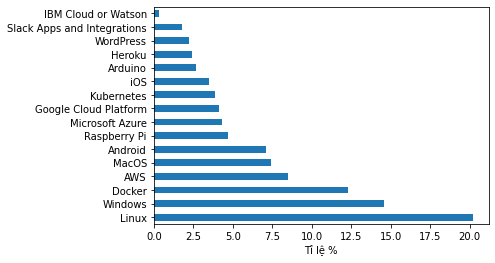

In [23]:
most_loved_platforms.plot.barh()
plt.xlabel('Tỉ lệ %');

---

## Ask the questions II

**Question 2:** Compare the average working hours and salary of people in the different groups based on job satisfaction.


---

## Preprocess data

In [24]:
data_range = survey_df[['ConvertedComp', 'WorkWeekHrs', 'JobSat']].dropna(how='any')
data_range.head(5)

,ConvertedComp,WorkWeekHrs,JobSat
Respondent,,,
8,116000.0,39.0,Slightly dissatisfied
10,32315.0,36.0,Very satisfied
11,40070.0,40.0,Slightly dissatisfied
12,14268.0,40.0,Very dissatisfied
13,38916.0,36.0,Very satisfied


---

## Analyze data

In [25]:
def agg_3(col):
    result = []
    result.append(col.mean()) # mean
    return pd.Series(result, index=['mean'])

table = data_range.groupby('JobSat').agg(agg_3).round(1)
table

,ConvertedComp,WorkWeekHrs
JobSat,,
Neither satisfied nor dissatisfied,88971.8,39.7
Slightly dissatisfied,95506.8,40.0
Slightly satisfied,98667.7,40.1
Very dissatisfied,95176.5,40.4
Very satisfied,119242.6,40.5


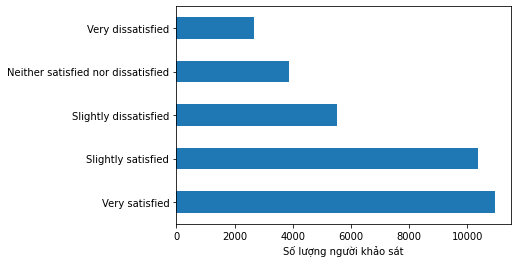

In [26]:
plt.xlabel('Số lượng người khảo sát')
data_range['JobSat'].value_counts().plot.barh()

- It shows that the average working time a week fluctuates around 40 hours mainly, although the working time is not much different, the salary received in the group that feels very satisfied having the top earnings. The group is not satisfied or less satisfied, the salary is not too low > 9500 USD, while the group that feels normal work has no feeling about the job, the salary is much lower than the other groups.
- The bar chart shows that currently most of the programmers are satisfied with their work, the data in column 4, 5 (satisfied and very satisfied) have 2 times higher salary than other groups.